# System identification
#### Author - Guner Aygin
##### Date - 20/10/2020

In this assignment you are presented with a number of "black box" components, each of which contains code that models a certain electronic system. By investigating the response of each box to generated input (voltage) signals, you will be able to determine the type of system each box contain and estimate its parameters (e.g. resistance and inductance).
Before you continue with this assignment, please read `Y2_Computing_System_Identification.pdf` available on Canvas, and work though the example notebook `black_box_example.ipynb` provided as part of this assignment.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Do not alter any of the code within this cell other than the value of studentID
from module_engine.assignment import Boxes
studentID = 1996263

# Creating box objects to be investigated in this assignment
t1_box1, t1_box2, t1_box3, t2_box, t3_box = Boxes.get_boxes(studentID)

The student ID is valid.

The student ID is valid.

The student ID is valid.

The student ID is valid.

The student ID is valid.



## Task 1

Each of the following circuits is contained in *one* of the boxes `t1_box1`, `t1_box2` and `t1_box3`:
- RL high pass filter;
- RC low pass filter;
- RLC band pass filter.

By analysing the action of each box on custom signals and employing the `.fft` and `.fftfreq` functions from `numpy.fft`, identify the type of circuit contained in each box. A blank cell has been provided for your working, but you are free to insert as many additional cells as you require. 

After completing your investigation set the variables `RL_circuit`, `RC_circuit` and `RLC_circuit` in the next cell to a value of 1, 2 or 3 to indicate which box matches the relevant circuit. For example, write `RC_circuit = 1` if you believe `t1_box1` to be the RC low pass filter or
`RC_circuit = 2` if you believe that system is in `t1_box2`.

**Reminder**:
Use the `.process()` method to interact with the `Boxes` objects, as shown in `black_box_example.ipynb`

**Hint**:
In order to obtain an informative result, your time domain input signal should contain frequency components ranging from 10 to 4000 Hz.

In [7]:
def swept_sine(f1, f2, t):
    """ 
    create a sine wave with a frequency sweeping between f1 and f2
    f1: start frequency [Hz]
    f2: stop frequency [Hz]
    t: np.array of linearly spaced points in time [s]
    """
    f = np.linspace(f1,f2,t.size)
    output = np.sin(2*np.pi*f*t)
    return output

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
def get_time_array(N, duration, endpoint=False):
    # N: number of sample points.
    # duration: end point of the time interval,
    # Note two mandatory arguments, and one argument with a default value.

    t = np.linspace(0, duration, num=N, endpoint=endpoint) 
    total_time = t[-1]-t[0] # different from duration!!
    timestep = total_time/(N-1) 
    print("Data points = {}".format(N))
    print("Total time  = {} s".format(total_time))
    print("Time step   = {} s".format(timestep))
    print("Sampling frequency = {} Hz".format((1/timestep)))
    
    return t

# generate an array of time points
t = get_time_array(N=2000000, duration=10.0)

# generate an array containing input signal (voltage) 
s_in = swept_sine(100,100000,t)

Data points = 2000000
Total time  = 9.999995 s
Time step   = 5e-06 s
Sampling frequency = 199999.99999999997 Hz


In [9]:
s_out_1 = t1_box1.process(t, s_in)
s_out_2 = t1_box2.process(t, s_in)
s_out_3 = t1_box3.process(t, s_in)

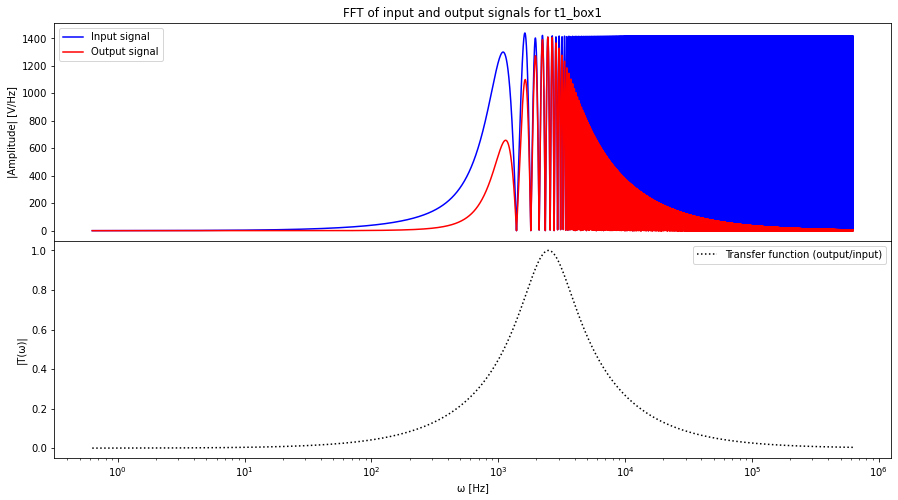

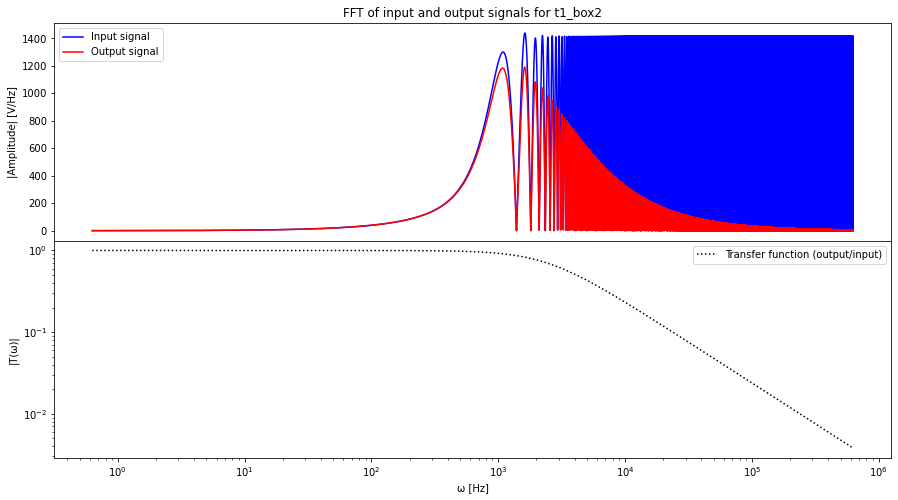

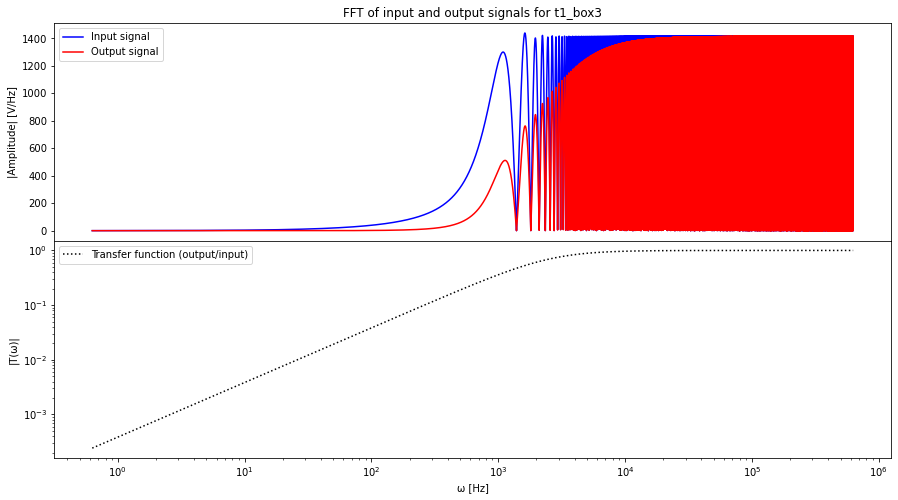

In [10]:
# Perform the Fourier Tranform on both signals
S_in = np.fft.fft(s_in)
S_out_1 = np.fft.fft(s_out_1)
S_out_2 = np.fft.fft(s_out_2)
S_out_3 = np.fft.fft(s_out_3)

# Next we generate sample points in the frequency domain,
# for this we need to know the duration and time step
# of the time array.
def get_frequency_array(t):
    N = len(t)
    timestep = np.diff(t)[0]
    f = np.fft.fftfreq(N, d=timestep)
    return f

f = get_frequency_array(t)

# We only want to plot the positive frequencies from the FFT.
# This means we can ignore half of each array.
# Check the numpy.fftfreq documentation to see that 
# frequencies are arranged as follows:
# f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)  if n is even
# So we are interested in the elements f[1:n/2].
def get_positive_frequencies(A):
    N=len(A)
    if len(A)//2==0:
        N2=int(N/2)
    else:
        N2=int((N+1)/2)
    return A[1:N2]

f = get_positive_frequencies(f)
# making sure that all input and output signals are positive
S_in = get_positive_frequencies(S_in)
S_out_1 = get_positive_frequencies(S_out_1) 
S_out_2 = get_positive_frequencies(S_out_2)
S_out_3 = get_positive_frequencies(S_out_3)

# Creating some custom subplots
fg, ax = plt.subplots(2,1, figsize=(15,8), sharex=True)

# Plot the absolute values of transformed_output T1_BOX1
ax[0].plot(2*f*np.pi, np.abs(S_in), 'b-', label='Input signal') 
ax[0].plot(2*f*np.pi, np.abs(S_out_1), 'r-', label='Output signal')
ax[0].legend()

ax[1].plot(2*f*np.pi, np.abs(S_out_1/S_in), 'k:', label='Transfer function (output/input)')
ax[1].set_xlabel('\u03C9 [Hz]')
ax[1].set_xscale("log")
ax[1].set_ylabel('|T(\u03C9)|')
ax[1].legend()

ax[0].set_title('FFT of input and output signals for t1_box1')
ax[0].set_ylabel('|Amplitude| [V/Hz]')

# Fine-tune figure; make subplots close to each other and hide x ticks for top plot.
fg.subplots_adjust(hspace=0)
plt.setp(ax[0].get_xticklabels(), visible=False)
plt.show()



fg, ax = plt.subplots(2,1, figsize=(15,8), sharex=True)
# Plot the absolute values of transformed_output T1_BOX2
ax[0].plot(2*f*np.pi, np.abs(S_in), 'b-', label='Input signal') 
ax[0].plot(2*f*np.pi, np.abs(S_out_2), 'r-', label='Output signal')
ax[0].legend()

ax[1].plot(2*f*np.pi, np.abs(S_out_2/S_in), 'k:', label='Transfer function (output/input)')
ax[1].set_xlabel('\u03C9 [Hz]')
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_ylabel('|T(\u03C9)|')
ax[1].legend()

ax[0].set_title('FFT of input and output signals for t1_box2')
ax[0].set_ylabel('|Amplitude| [V/Hz]')

# Fine-tune figure; make subplots close to each other and hide x ticks for top plot.
fg.subplots_adjust(hspace=0)
plt.setp(ax[0].get_xticklabels(), visible=False)
plt.show()



fg, ax = plt.subplots(2,1, figsize=(15,8), sharex=True)
# Plot the absolute values of transformed_output T1_BOX3
ax[0].plot(2*f*np.pi, np.abs(S_in), 'b-', label='Input signal') 
ax[0].plot(2*f*np.pi, np.abs(S_out_3), 'r-', label='Output signal')
ax[0].legend()

ax[1].plot(2*f*np.pi, np.abs(S_out_3/S_in), 'k:', label='Transfer function (output/input)')
ax[1].set_xlabel('\u03C9 [Hz]')
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_ylabel('|T(\u03C9)|')
ax[1].legend()

ax[0].set_title('FFT of input and output signals for t1_box3')
ax[0].set_ylabel('|Amplitude| [V/Hz]')

# Fine-tune figure; make subplots close to each other and hide x ticks for top plot.
fg.subplots_adjust(hspace=0)
plt.setp(ax[0].get_xticklabels(), visible=False)
plt.show()

In [11]:
# Now assign each of these variables a (unique) value of 1, 2 or 3.
# For example if you know that t1_box2 contains the RC_circuit, set RC_circuit=2.
# If instead you found the RC_circuit in t1_box1, set RC_circuit=1.
RL_circuit = 3
RC_circuit = 2
RLC_circuit = 1 

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Task 2

You are to work with the black box `t2_box` (defined in the first cell of the notebook) in this task. It is known that this box contains an **RL high pass** filter circuit, but with parameter values **different** from those of the RL high pass circuit in task 1. 

Employing a similar method to that used in task 1, examine the characteristic transfer function of this circuit to determine an approximate value for the associated corner frequency, i.e. such frequency $f_0$ that $|T(f_0)| =1/\sqrt{2}$. 

The examples in `Y2_Computing_System_Identification.pdf` refer to $T(\omega)$ while we sometimes use $T(f)$. These are the same function just plotted over a different axis ($\omega = 2\pi f$). It is easy to make mistakes when applying this scaling. You should always check if you are using the right frequency scaling for a given task.

After you complete you investigation store the value for $f_0$ in the variable `corner_frequency`. During marking, your value will be compared to the true value with a tolerance of 10 Hz. Ensure that your sample density in the frequency domain is sufficient to achieve this level of accuracy.

Furthermore, assuming that the resistance of the circuit is R=200 &Omega;, calculate the inductance of the inductor in Henrys and store this in the variable `inductance`. Do **not** round this value.

**Hints**:
  * Your time domain input signal should contain frequency components ranging from 10 to 3000 Hz in order to obtain an informative result. 
  * For finding a specific value in a numpy array you may use the `numpy.argmin` function. 
  Play with and understand the following code:
  ```
  a=np.array([10, 11, 12, 15, 20, 30])
  index=np.argmin(np.abs(a-15))
  print(index)
  print(a[index])
  ```
  * To check visually whether you found the corner frequency correctly you can plot additional lines into the graph with the transfer fucntion, for example using `plt.axvline(x=f0)` and `plt.axhline(y=1/np.sqrt(2),linestyle='--')`.

In [12]:
a=np.array([10, 11, 12, 15, 20, 30])
index=np.argmin(np.abs(a-15))
print(index)
print(a[index])

3
15


In [13]:
# This cell is for work on task 2 - explore frequencies up to 3000 Hz

# NOTE: definitions not explicitly stated here have been defined in Task 1
t = get_time_array(N=600000, duration=10.0)
s_in = swept_sine(10,3000,t)

Data points = 600000
Total time  = 9.999983333333335 s
Time step   = 1.6666666666666667e-05 s
Sampling frequency = 60000.0 Hz


In [14]:
s_out = t2_box.process(t, s_in)

# Perform the Fourier Tranform on both signals
S_in = np.fft.fft(s_in)
S_out = np.fft.fft(s_out)

# Get array of frequencies
f = get_frequency_array(t)

# Only want positive frequencies so:
f = get_positive_frequencies(f)
S_in = get_positive_frequencies(S_in)
S_out = get_positive_frequencies(S_out)

T = abs(S_out/S_in) # transfer function

In [15]:
index=np.argmin(np.abs(T-(1/np.sqrt(2)))) # <--- finding the closest value to 1/sqrt(2)
print(index) 
print(T[index]) # <--- value of T corresponding to closest value to 1/sqrt(2)
f0 = f[index] # <--- value of f when T is closest to 1/sqrt(2)
print(f0)

13689
0.7071171685262166
1369.0


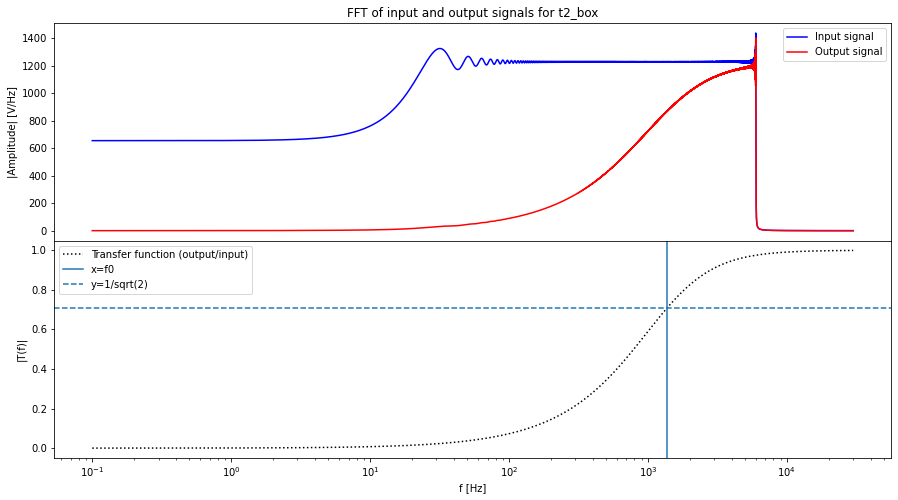

In [16]:
# Creating some custom subplots
fg, ax = plt.subplots(2,1, figsize=(15,8), sharex=True)

# Plot the absolute values of transformed_output T1_BOX1
ax[0].plot(f, np.abs(S_in), 'b-', label='Input signal') 
ax[0].plot(f, np.abs(S_out), 'r-', label='Output signal')
ax[0].legend()

ax[1].plot(f, np.abs(S_out/S_in), 'k:', label='Transfer function (output/input)')
ax[1].set_xlabel('f [Hz]')
ax[1].axvline(f0, label='x=f0')
ax[1].axhline(y=1/np.sqrt(2),linestyle='--', label='y=1/sqrt(2)')
ax[1].set_xscale("log")
ax[1].set_ylabel('|T(f)|')
ax[1].legend()

ax[0].set_title('FFT of input and output signals for t2_box')
ax[0].set_ylabel('|Amplitude| [V/Hz]')

# Fine-tune figure; make subplots close to each other and hide x ticks for top plot.
fg.subplots_adjust(hspace=0)

plt.setp(ax[0].get_xticklabels(), visible=False)
plt.show()

In [17]:
# w0 = R/L
# Inductance L = R/w0
# L = R/(2*pi*f0)

R = 200
L = R/(2*np.pi*f0)
print(L)

0.02325126999151137


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Put your solutions to task 2 here
corner_frequency = 1369  # Corner frequency in Hz
inductance =  L       # Inductance in Henrys

## Resonance in RLC series circuits
The sharp peak in transmission for an RLC series circuit associated with a minimum of impedance is referred to as series resonance, with the **resonance frequency** $f_0$ being that at which the transfer function attains its maximum value of $T(\omega_0)=1$. Considering that

$$|T(\omega) | = \frac{R}{\sqrt{R^2+(\omega L - 1/\omega C)^2}},$$

this occurs when $\omega L = 1/\omega C$ (i.e. the inductive reactance equals the capacitive reactance). Therefore the resonance frequency is

$$\omega_0^2 = \frac{1}{LC} \implies f_0 = \frac{1}{2\pi \sqrt{LC}}.$$

For all intents and purposes, a signal is passed by an RLC circuit if it has a frequency contained between the **two** (lower and upper) cut-off frequencies, $f_l$ and $f_h$, at which the transfer function has a magnitude of $1/\sqrt{2}$. The **bandwidth** of the circuit (also known as the resonance width) is then defined as the difference between these two frequencies, i.e $f_h - f_l$.

## Task 3

You are to work with the blackbox `t3_box` (defined in the first cell of the notebook) in this task. This contains an **RLC band pass** filter circuit, with values of resistance, inductance and capacitance different from those of the RLC circuit in task 1.

Firstly, determine the transfer function for this circuit and **plot its magnitude**, $|T(f)|$, against frequency, $f$ (in Hz), on the interval <nobr>$f \in [10,2000]$ Hz</nobr> on the figure object provided (`student_figure`). You should ensure that your input signal contains frequency components ranging from 10 to <nobr>2000 Hz</nobr> (we recommend that you use at least 4000 samples and a signal length of 1s).

You should use a linear scale on the y-axis (do **not** use dB), and a logarithmic scale on the frequency axis. This is achieved through the use of the `plt.semilogx()` function. Your plot should also have a title and axis titles. 

Do not add other data or lines to the plot in `student_figure`. If you want to make additional plots, you should create those as separate figures that use different names.

Using your plotted data or otherwise, estimate the **resonant frequency** and the **bandwidth** of the circuit in Hz and assign these to the variables `resonant_frequency` and `bandwidth`. As in task 2, these values should be accurate to 10 Hz.

In [19]:
# NOTE: definitions not explicitly stated here have been defined in Task 1
t = get_time_array(N=400000, duration=1.0)
s_in = swept_sine(10,2000,t)

Data points = 400000
Total time  = 0.9999975000000001 s
Time step   = 2.5e-06 s
Sampling frequency = 399999.99999999994 Hz


In [20]:
s_out = t3_box.process(t, s_in)

# Perform the Fourier Tranform on both signals
S_in = np.fft.fft(s_in)
S_out = np.fft.fft(s_out)

# Get array of frequencies
f = get_frequency_array(t)

# Only want positive frequencies so:
f = get_positive_frequencies(f)
S_in = get_positive_frequencies(S_in)
S_out = get_positive_frequencies(S_out)

T = abs(S_out/S_in) # transfer function

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


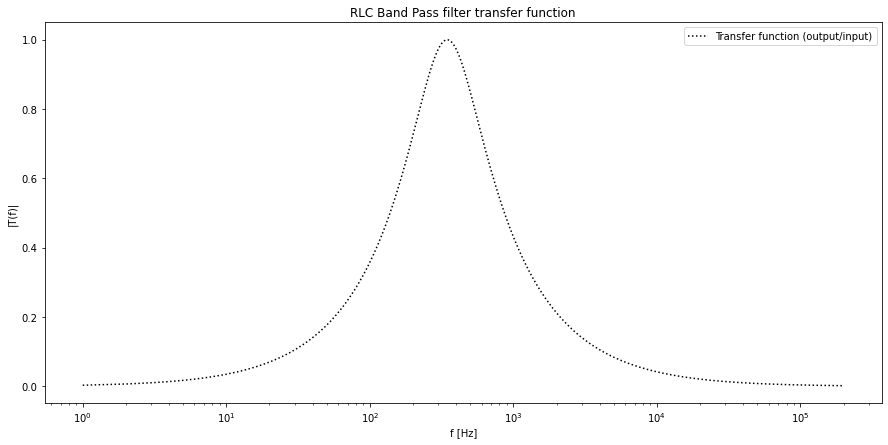

In [22]:
# Please do not create any other figure object 
student_figure = plt.figure(figsize=(15,7))

plt.plot(f, np.abs(S_out/S_in), 'k:', label='Transfer function (output/input)')
plt.title('RLC Band Pass filter transfer function')
plt.xlabel('f [Hz]')
plt.ylabel('|T(f)|')
plt.legend()

plt.semilogx()
fg.subplots_adjust(hspace=0)

plt.setp(ax[0].get_xticklabels(), visible=False)
plt.show()
# You may perform additional working, but ensure that the plot
# you wish to be marked is on student_figure defined above

In [17]:
# In order to find the upper bound and lower bound values for frequency (f_h and f_l respectively)
# one must do the same thing as in task 2, by finding the closest value to 1/sqrt(2)
# however in this case there are two points, either side of the maximum, so I will try to find each
# value separately.
# As the graph is logarithmic you find the difference between the logs of the f_h value and f_midpoint 

index = np.argmin(np.abs(T-np.sqrt(1/2)))
log_f_h = np.log(f[index])
print(log_f_h)

midpoint = np.argmax(T)
log_f_mid = np.log(f[midpoint])
print(log_f_mid)

log_diff = log_f_h-log_f_mid # graph symmetric so in there is a value +- log_diff of the midpoint
log_f_l = log_f_mid - log_diff
print(log_f_l)

f_l = np.exp(log_f_l)
f_h = np.exp(log_f_h)
print(f_l)
print(f_h)

6.423246963533519
5.846438775057725
5.26963058658193
194.3441558441561
615.9999999999998


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


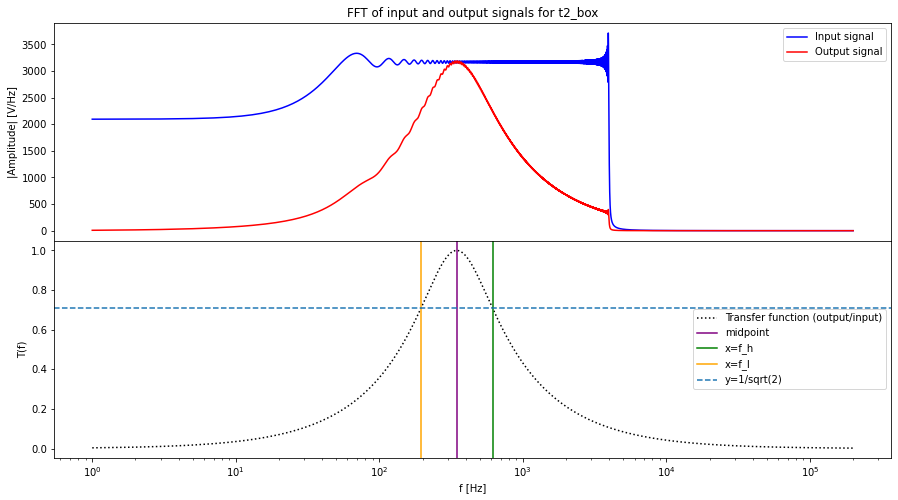

In [18]:
# Creating some custom subplots
fg, ax = plt.subplots(2,1, figsize=(15,8), sharex=True)

# Plot the absolute values of transformed_output T1_BOX1
ax[0].plot(f, np.abs(S_in), 'b-', label='Input signal') 
ax[0].plot(f, np.abs(S_out), 'r-', label='Output signal')
ax[0].legend()

ax[1].plot(f, np.abs(S_out/S_in), 'k:', label='Transfer function (output/input)')
ax[1].set_xlabel('f [Hz]')
ax[1].axvline(midpoint, color = 'purple', label='midpoint')
ax[1].axvline(f_h, color = 'green', label='x=f_h')
ax[1].axvline(f_l, color = 'orange', label='x=f_l')
ax[1].axhline(y=1/np.sqrt(2),linestyle='--', label='y=1/sqrt(2)')
ax[1].set_xscale("log")
ax[1].set_ylabel('T(f)')
ax[1].legend()

ax[0].set_title('FFT of input and output signals for t2_box')
ax[0].set_ylabel('|Amplitude| [V/Hz]')

# Fine-tune figure; make subplots close to each other and hide x ticks for top plot.
fg.subplots_adjust(hspace=0)

plt.setp(ax[0].get_xticklabels(), visible=False)
plt.show()

In [19]:
# resonant frequency = midpoint of graph, but to double check that they are the same value...
resonance = np.argmin(np.abs(T-1)) #T(f0)= 1
print(T[resonance])
T[resonance] == T[midpoint] # True, T[resonance] == T[midpoint] 
resonant_frequency = f[resonance]
print(resonant_frequency)


Bandwidth = f_h - f_l
print(Bandwidth)

0.9999995973984511
346.0
421.6558441558437


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
resonant_frequency = 346 # Resonant frequency in Hz
bandwidth = Bandwidth # Bandwidth in Hz

## Task 4

For the final task you are to create your own black box function called `my_box_process(t, s_in, R, L)` that mimics the behaviour of an **RL low pass filter** circuit of resistance `R` (Ohms) and inductance `L` (Henrys).

`t` and `s_in` will be two NumPy arrays representing an input voltage signal with physical amplitude `s_in[i]` at time `t[i]`, and the function should return a NumPy array containing the **real** output signal in the time domain (i.e. the final output data must be real numbers not complex numbers).

You will need the transfer function for the RL low-pass filter circuit:
$$T(f) = \frac{1}{1+i(f/f_0)},$$ where $f_0 = R/(2\pi L)$.

#### Hints:
- Use `.fft` to perform an FFT on the input signal before applying the transfer function in the frequency domain. You will then need to use the `.ifft` function to represent this modulated signal in the time domain (see [ifft in the numpy documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.ifft.html)).
- You may wish to define the transfer function separately and call this within my_box_process.
- In Python, `1j` is used to represent the imaginary unit.
- Make sure your function returns a physical time domain signal (i.e. real values that can change sign). The `ifft` function will return an array of complex numbers with the real part of these numbers containing the signal we are interested in.
- Because the input and output of your black box must be NumPy arrays, you do not need to use any `for` loops in your code.

In [21]:
def transfer_function(t, R, L):
    ''' 
    definition of transfer function, to be called for in my_box
    f: frequency [Hz]
    R: resistance [Ohms]
    L: inductance [Henrys]
    '''
    f = get_frequency_array(t)
    f0 = R/(2*np.pi*L)
    T_f = 1/(1+(1j)*(f/f0))
    return T_f

In [22]:
t = get_time_array(N=600000, duration=10.0)
s_in = swept_sine(10,3000,t)

Data points = 600000
Total time  = 9.999983333333335 s
Time step   = 1.6666666666666667e-05 s
Sampling frequency = 60000.0 Hz


In [23]:
# Function definition for task 4
def my_box_process(t, s_in, R, L):
    ''' 
    Functiom that mimics the behaivour of an RL low pass filter circuit
    
    The function will return a NumPy array containing only the real output
    signal in the time domain.
    
    t: np.array of linearly spaced points in time [s]
    s_in: np.array of input signal with amplitude s_in[i] at time t[i]
    R: resistance [Ohms]
    L: inductance [Henrys]
    '''
    f = get_frequency_array(t)
    f = get_positive_frequencies(f)   # gives us |T_f| when f is used in transfer function
    S_in = np.fft.fft(s_in)
    T_f = transfer_function(t, R, L)
    S_out = (T_f)*(S_in)
    s_out = np.fft.ifft(S_out)
    
    # we only want the real components of s_out 
    s_out = np.real(s_out)
    
    return s_out

In [24]:
# Feel free to insert additional cells for working
my_box_process(t, s_in, R=10, L=10E-3)

array([-0.02689769, -0.02627883, -0.02587595, ..., -0.00074285,
       -0.01623887, -0.02534288])

### Check to see if my_box_process mimics the behaivour of an RL low pass filter

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


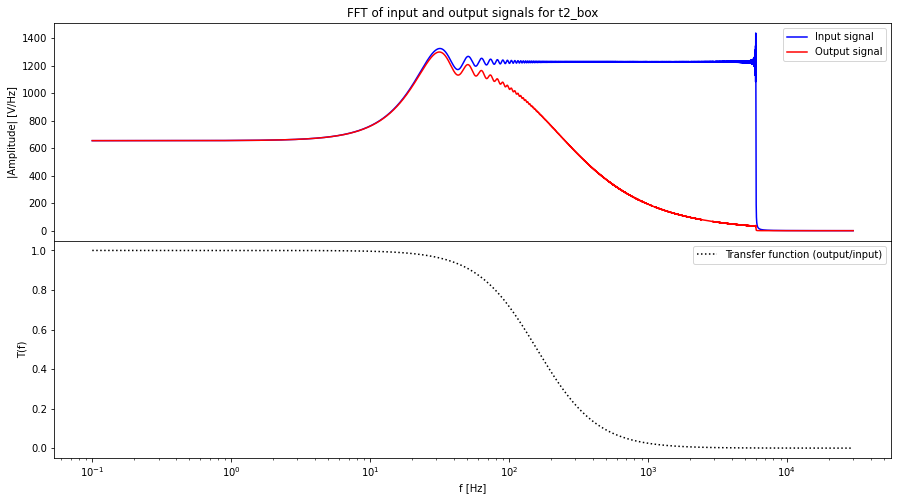

In [25]:
s_out = my_box_process(t, s_in, R=10, L=10E-3)

# Perform the Fourier Tranform on both signals
S_in = np.fft.fft(s_in)
S_out = np.fft.fft(s_out)

# Get array of frequencies
f = get_frequency_array(t)

# Only want positive frequencies so:
f = get_positive_frequencies(f)
S_in = get_positive_frequencies(S_in)
S_out = get_positive_frequencies(S_out)


# Creating some custom subplots
fg, ax = plt.subplots(2,1, figsize=(15,8), sharex=True)

# Plot the absolute values of transformed_output 
ax[0].plot(f, np.abs(S_in), 'b-', label='Input signal') 
ax[0].plot(f, np.abs(S_out), 'r-', label='Output signal')
ax[0].legend()

ax[1].plot(f, (S_out/S_in), 'k:', label='Transfer function (output/input)')
ax[1].set_xlabel('f [Hz]')
ax[1].set_xscale("log")
ax[1].set_ylabel('T(f)')
ax[1].legend()

ax[0].set_title('FFT of input and output signals for t2_box')
ax[0].set_ylabel('|Amplitude| [V/Hz]')

# Fine-tune figure; make subplots close to each other and hide x ticks for top plot.
fg.subplots_adjust(hspace=0)

plt.setp(ax[0].get_xticklabels(), visible=False)
plt.show()

Please execute the following statement before submitting your work. It will check that you have used correct naming for the variables and functions specified in the above tasks. It will not tell you whether you have correctly defined and implemented these! You may execute this statement as many times as required.

In [1]:
Boxes.check()

NameError: name 'Boxes' is not defined